## Pima Indians Diabetes Analysis

#####  Perform Exploratory Data Analysis to identify the impact of various attributes on the diabetes rates of the Pima Indians

### Attribute Information:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1)

### Import libraries

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style
sns.set_style(style='darkgrid')

### Load and explore the data

In [11]:
# Load the data into pandas dataframe
df = pd.read_csv("pima-indians-diabetes.csv")

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


## George's Tip and Challenge!
It's best practice to use lowercase col names, but how?

In [14]:
# Check number of rows and columns
df.shape

(768, 9)

In [15]:
# Check column types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      768 non-null int64
Glucose          768 non-null int64
BloodPressure    768 non-null int64
SkinThickness    768 non-null int64
Insulin          768 non-null int64
BMI              768 non-null float64
DPF              768 non-null float64
Age              768 non-null int64
Outcome          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

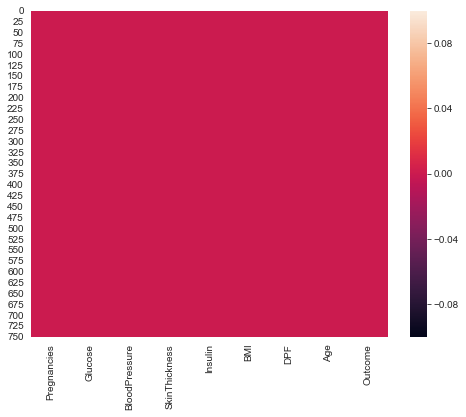

In [17]:
# Check missing values via heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.isna())
plt.show()

## Univariate

- How to interpret the average of a binary field?
- What can we tell about the shape of distributions from the summary statistics above?

In [18]:
# Example of a binary array
a = [1,1,1,1,1,1,0,0,0,0]

# Find the average of the binary array
np.mean(a)

0.6

- Is the average above or below the median in the distribution above?

In [19]:
# Create summary statistics for numeric fields
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DPF,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


#### Skewness of the variables

In [20]:
df.skew()

Pregnancies      0.90
Glucose          0.17
BloodPressure   -1.84
SkinThickness    0.11
Insulin          2.27
BMI             -0.43
DPF              1.92
Age              1.13
Outcome          0.64
dtype: float64

**If skewness value is zero than it is not skewed**

**If it is less than zero then negatively skewed (left tail) and if greater than zero then positively skewed (right tail)**

`Data for all the attributes are skewed, especially for the variable "Insulin"`

`The mean for "Insulin" is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right`

## George's Tip
__Skewness__

- https://www.statisticshowto.com/pearson-mode-skewness/
- https://pythontic.com/pandas/dataframe-computations/skew


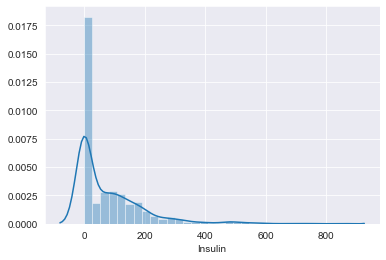

In [21]:
# Example of a skewed distribution (right tail)

sns.distplot(df['Insulin'])
plt.show()

#### Incorrect Imputations

In [22]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function elementwise

# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

df[~df.applymap(np.isreal).all(1)]

# this works only on continous columns.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome


## George's Challenge
- Walk thru the code pls :)
- A simpler way?

In [28]:
(~df.applymap(np.isreal)).sum().sum()

0

## George's Tip
- There are two types of cells: code and markdown. Use accordingly!
- Use markdown syntax to format text in your markdown cells
- Difference between `applymap` and `apply`

In [29]:
df['Outcome'].value_counts()
# See distrubtion of target variable

0    500
1    268
Name: Outcome, dtype: int64

In [30]:
df['Outcome'].value_counts(normalize=True)*100
# See percentage distribution of target variable

0   65.10
1   34.90
Name: Outcome, dtype: float64

## Bivariate

In [31]:
# Let us look at the target column 'Outcome' to understand how the data is distributed amongst the various fields
df.groupby(["Outcome"]).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
Outcome,,,,,,,,
0,3.30,109.98,68.18,19.66,68.79,30.30,0.43,31.19
1,4.87,141.26,70.82,22.16,100.34,35.14,0.55,37.07


In [32]:
# Let us look at the target column 'Outcome' to understand how the data is distributed amongst the various fields
df.groupby(["Outcome"]).median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
Outcome,,,,,,,,
0,2,107,70,21,39,30.05,0.34,27
1,4,140,74,27,0,34.25,0.45,36


**All the features have higher mean for people having diabetes**

**All the features have higher median for people having diabetes except "Insulin" which is understood as diabetes patient do not produce insulin**

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


## George's Challenge
What would be a good way to visualize above relationships?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022964113808>,
      dtype=object)

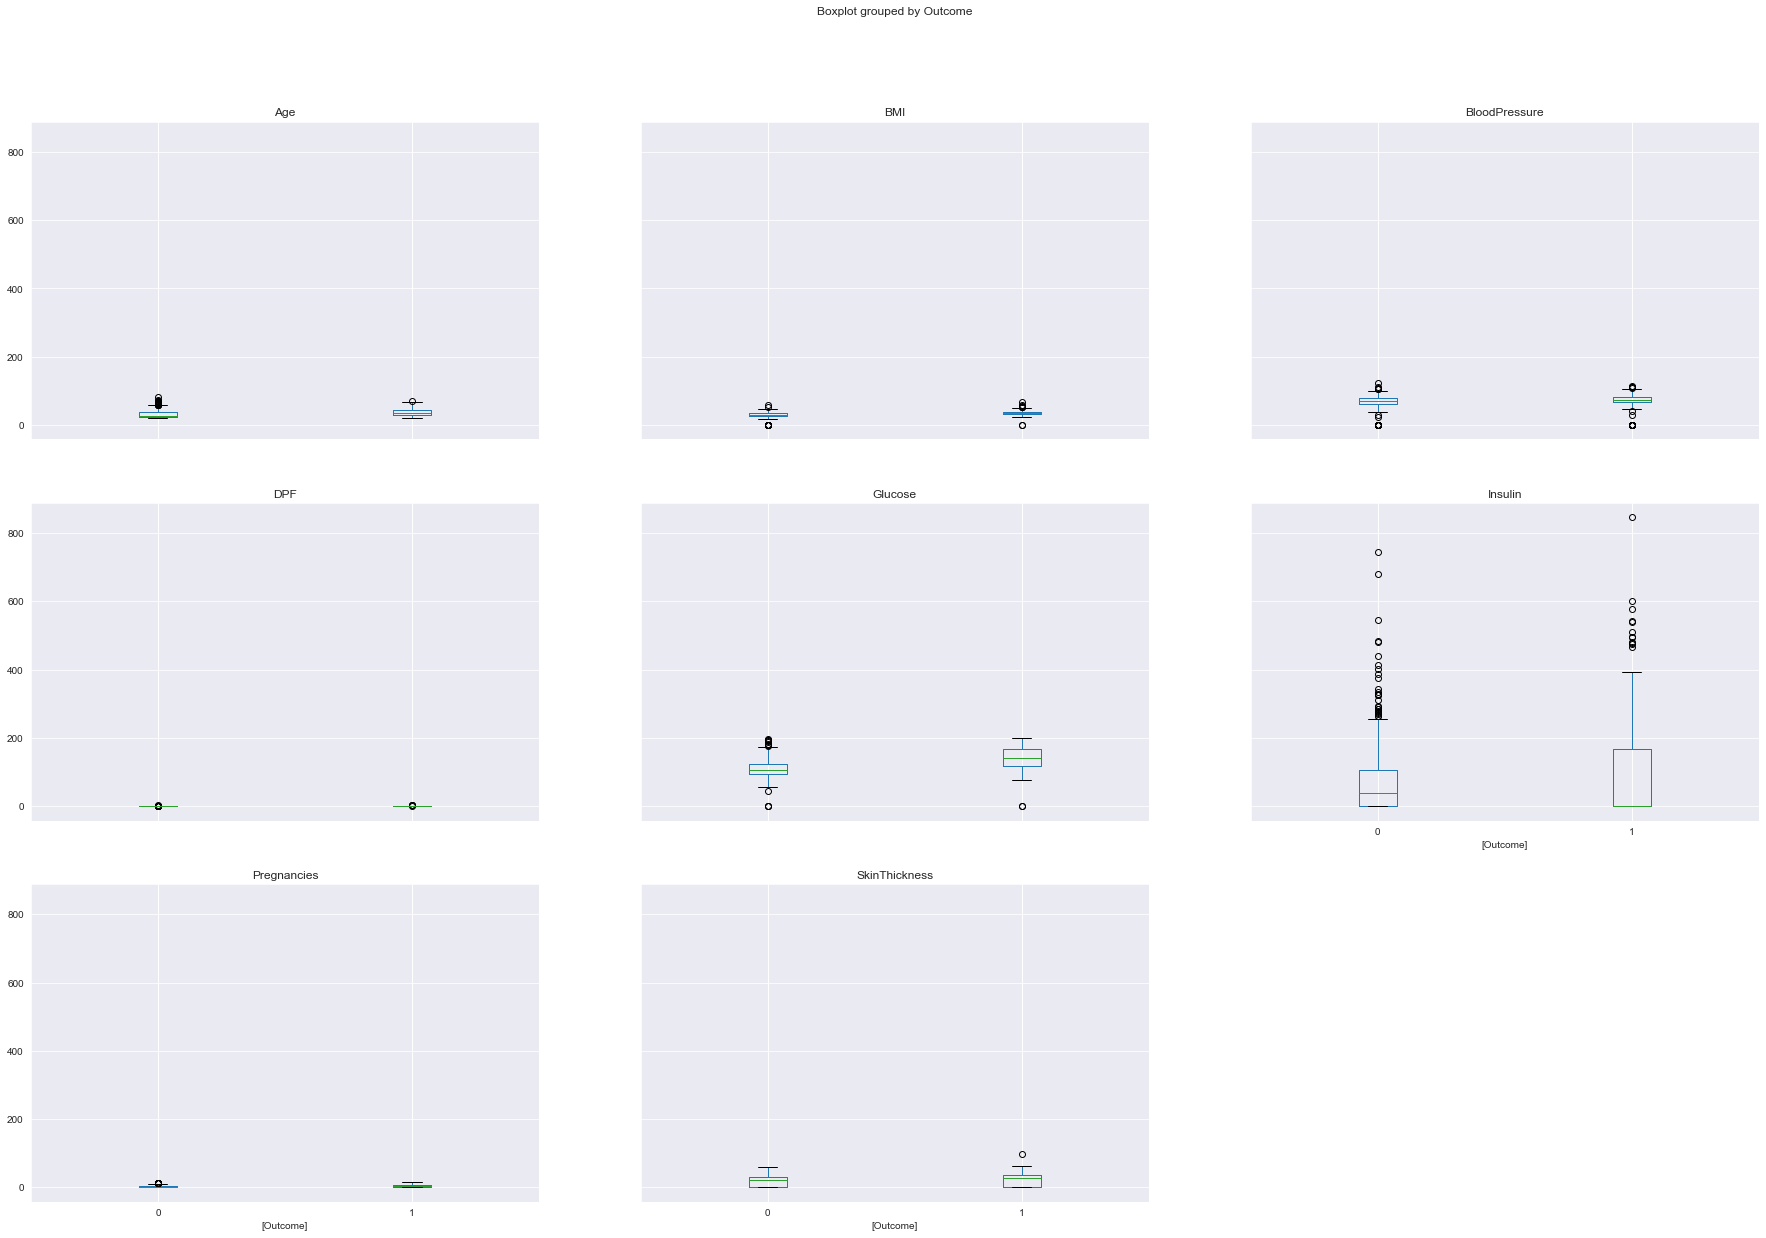

In [36]:
df.boxplot(by='Outcome', figsize=(30, 20))

#### Pair plot

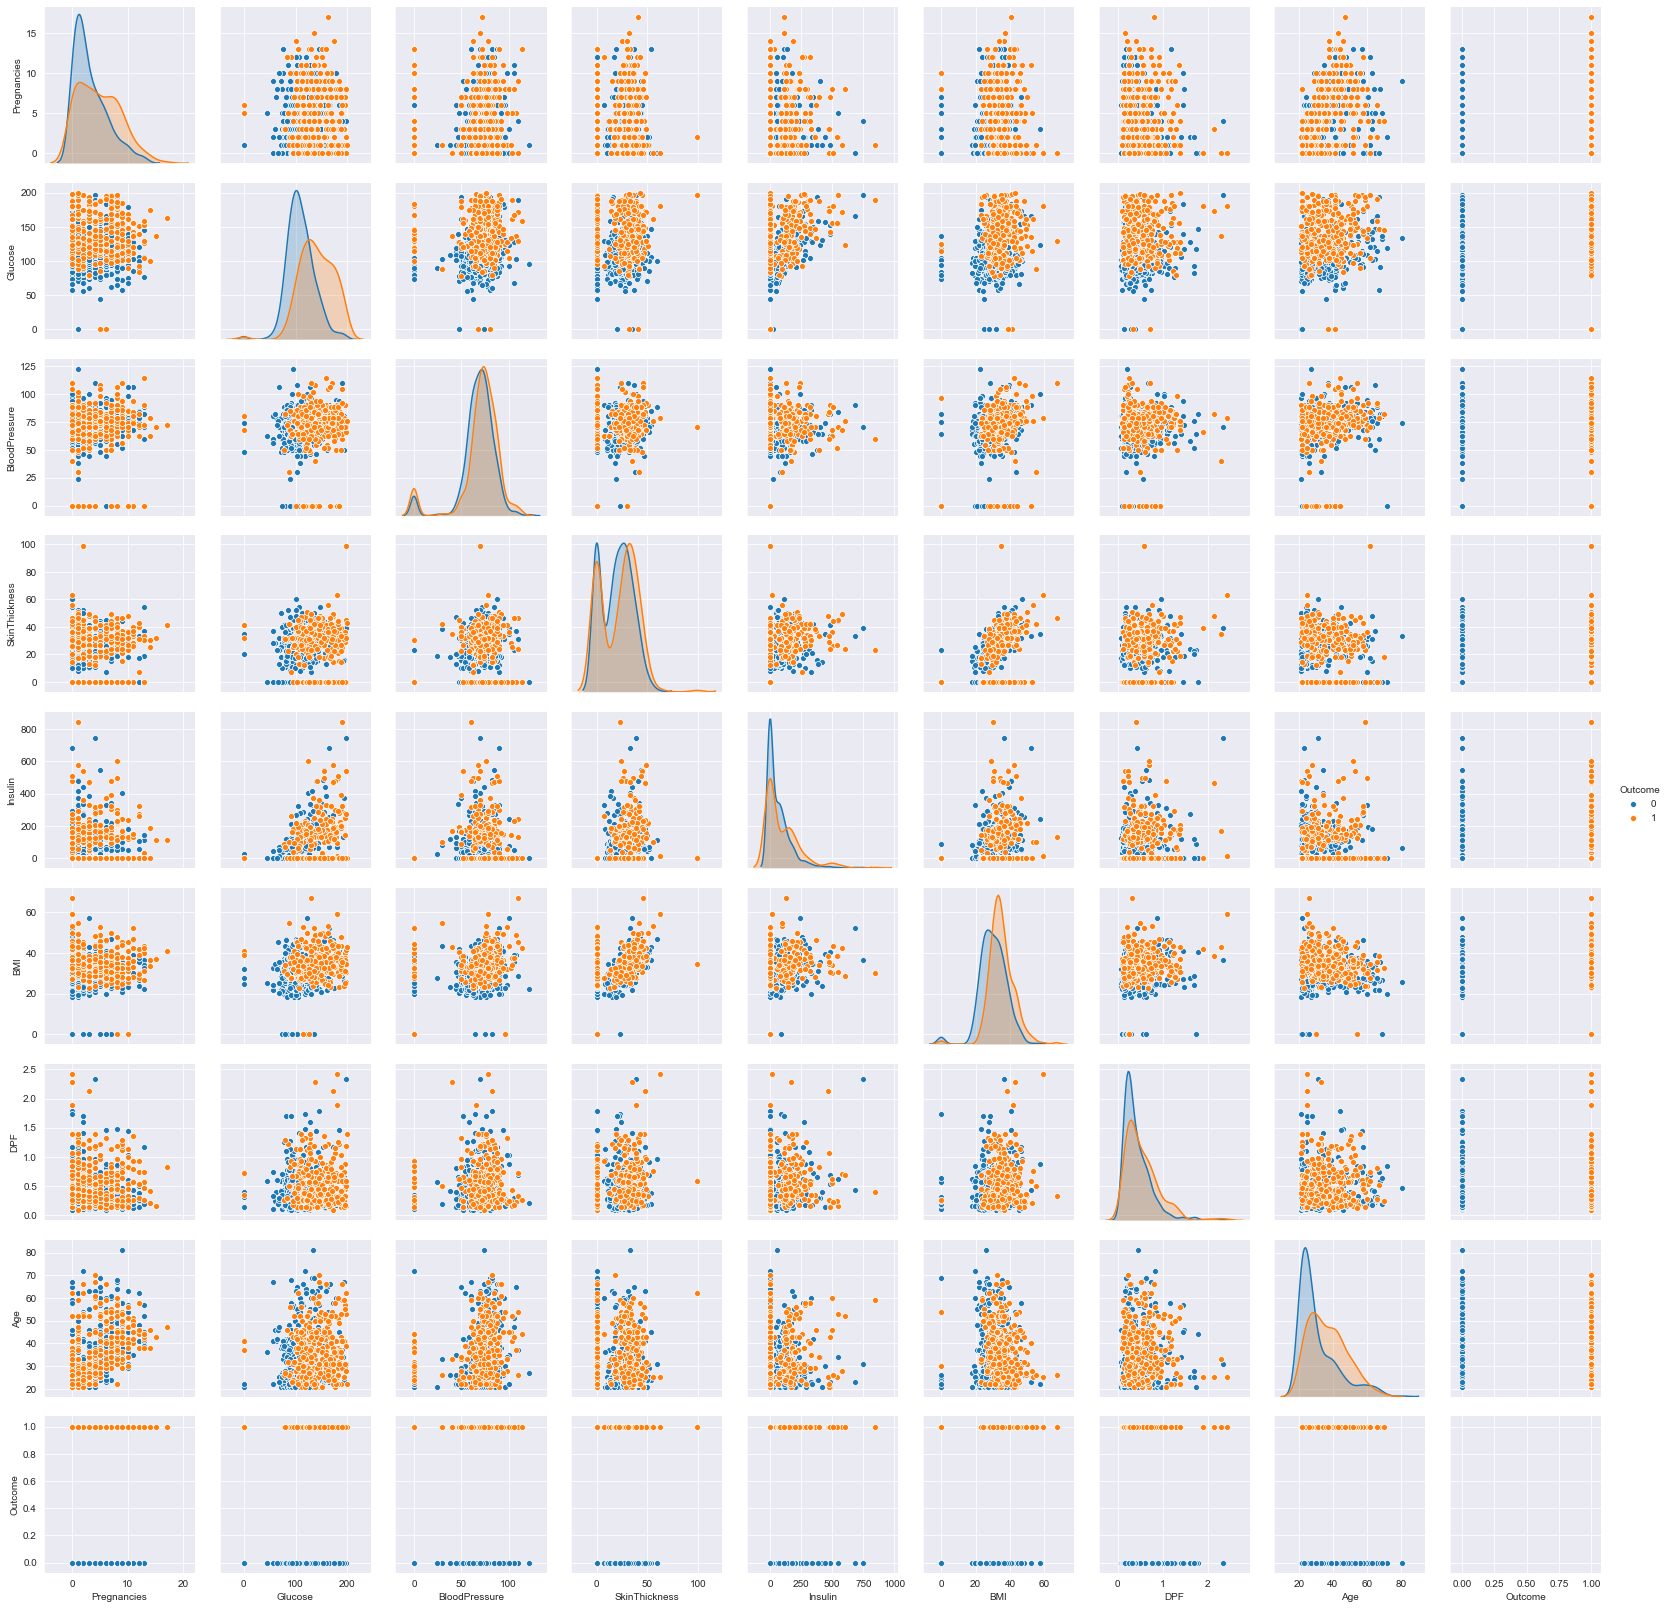

In [37]:
# Check distributions by Outcome
sns.pairplot(df, hue = 'Outcome')
plt.show()

`No clear relationship for any feature`

`Number of people having diabetes are higher for people with higher "Age", "BMI" and "Glucose"`

#### Correlation with target variable is signficant when target variable is continous

Here we can check if any feature is correlated amongst them.

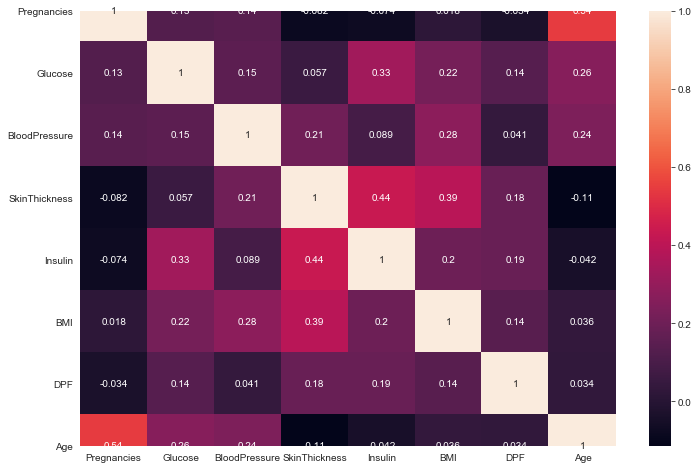

In [38]:
corr = df.drop('Outcome',axis=1).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)
plt.show()

`No high correlation between features`

### Data Preprocessing

#### Exampes of data standardization using mean and standard deviation

In [39]:
# Multiple ways to implement Z score standardization

# Standardization of entire data set using "zscore" function from scipy.stats package 
df_z = df.apply(zscore)

# Manual standardization of individual fields
df['Age_Z_Manual'] = (df['Age']-np.mean(df['Age']))/np.std(df['Age'])

# Using "zscore" function from scipy.stats package 
df['Age_Z_Scipy'] = df[['Age']].apply(zscore)

# Using "StandardScaler" function from sklearn.preprocessing package - useful for machine learning models  
df['Age_Z_Sklearn'] = StandardScaler().fit_transform(df[['Age']])

In [40]:
# View the new data set with all standardized fields
df_z.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,0.64,0.85,0.15,0.91,-0.69,0.20,0.47,1.43,1.37
1,-0.84,-1.12,-0.16,0.53,-0.69,-0.68,-0.37,-0.19,-0.73
2,1.23,1.94,-0.26,-1.29,-0.69,-1.10,0.60,-0.11,1.37
3,-0.84,-1.00,-0.16,0.15,0.12,-0.49,-0.92,-1.04,-0.73
4,-1.14,0.50,-1.50,0.91,0.77,1.41,5.48,-0.02,1.37


In [41]:
# View existing data set with new Age standardized fields
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,Age_Z_Manual,Age_Z_Scipy,Age_Z_Sklearn
0,6,148,72,35,0,33.60,0.63,50,1,1.43,1.43,1.43
1,1,85,66,29,0,26.60,0.35,31,0,-0.19,-0.19,-0.19
2,8,183,64,0,0,23.30,0.67,32,1,-0.11,-0.11,-0.11
3,1,89,66,23,94,28.10,0.17,21,0,-1.04,-1.04,-1.04
4,0,137,40,35,168,43.10,2.29,33,1,-0.02,-0.02,-0.02


` Zscore and Standard Scalar are same`

#### Exampes of data normalization using min and range

In [42]:
# Manual normalization
df['Age_Norm_Manual'] = (df['Age']-np.min(df['Age']))/(np.max(df['Age'])-np.min(df['Age']))

# Using "StandardScaler" function from sklearn.preprocessing package - useful for machine learning models  
df['Age_Norm_Sklearn'] = MinMaxScaler().fit_transform(df[['Age']])

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,Age_Z_Manual,Age_Z_Scipy,Age_Z_Sklearn,Age_Norm_Manual,Age_Norm_Sklearn
0,6,148,72,35,0,33.60,0.63,50,1,1.43,1.43,1.43,0.48,0.48
1,1,85,66,29,0,26.60,0.35,31,0,-0.19,-0.19,-0.19,0.17,0.17
2,8,183,64,0,0,23.30,0.67,32,1,-0.11,-0.11,-0.11,0.18,0.18
3,1,89,66,23,94,28.10,0.17,21,0,-1.04,-1.04,-1.04,0.00,0.00
4,0,137,40,35,168,43.10,2.29,33,1,-0.02,-0.02,-0.02,0.20,0.20


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DPF,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
Age_Z_Manual,768.00,0.00,1.00,-1.04,-0.79,-0.36,0.66,4.06


#### Exampe of data transformation using natural logarithm

In [46]:
# Log transformation of a skewed field using numpy log function
df['Age_Log'] = np.log(df['Age'])

# Log transformation of a skewed field with zeros
df['BloodPressure_Log'] = np.log(df['BloodPressure']+0.5)

## George's Tip
More about log transformation
- https://stats.stackexchange.com/questions/119835/correlation-between-a-nominal-iv-and-a-continuous-dv-variable
- https://stats.stackexchange.com/questions/18844/when-and-why-should-you-take-the-log-of-a-distribution-of-numbers
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/60861

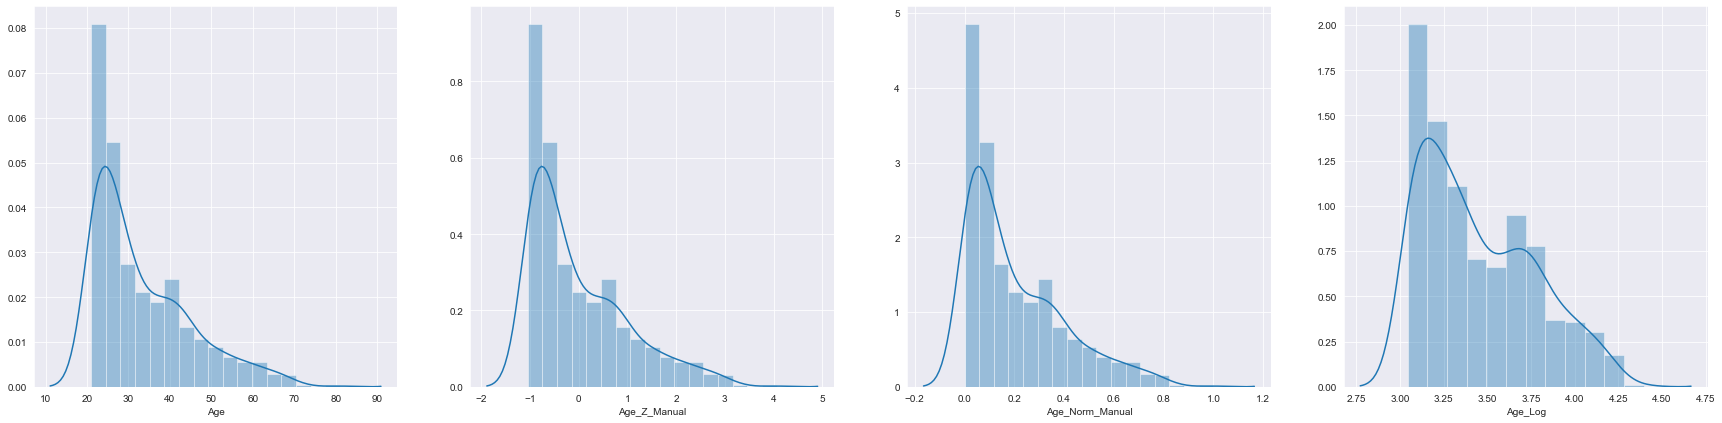

In [47]:
# Let's plot original, standardized, normalized, and log transformed Age fields
fig, axs = plt.subplots(ncols = 4, figsize = (30, 7))

sns.distplot(df['Age'], ax = axs[0])
sns.distplot(df['Age_Z_Manual'], ax = axs[1])
sns.distplot(df['Age_Norm_Manual'], ax = axs[2])
sns.distplot(df['Age_Log'], ax = axs[3]);

In [48]:
# Let's replace "Outcome" field in the standardized dataset with the original "Outcome" field
df_z['Outcome'] = df['Outcome']

In [49]:
# Create a list with features for plotting boxplots
features = [col for col in df_z.columns if col != 'Outcome']

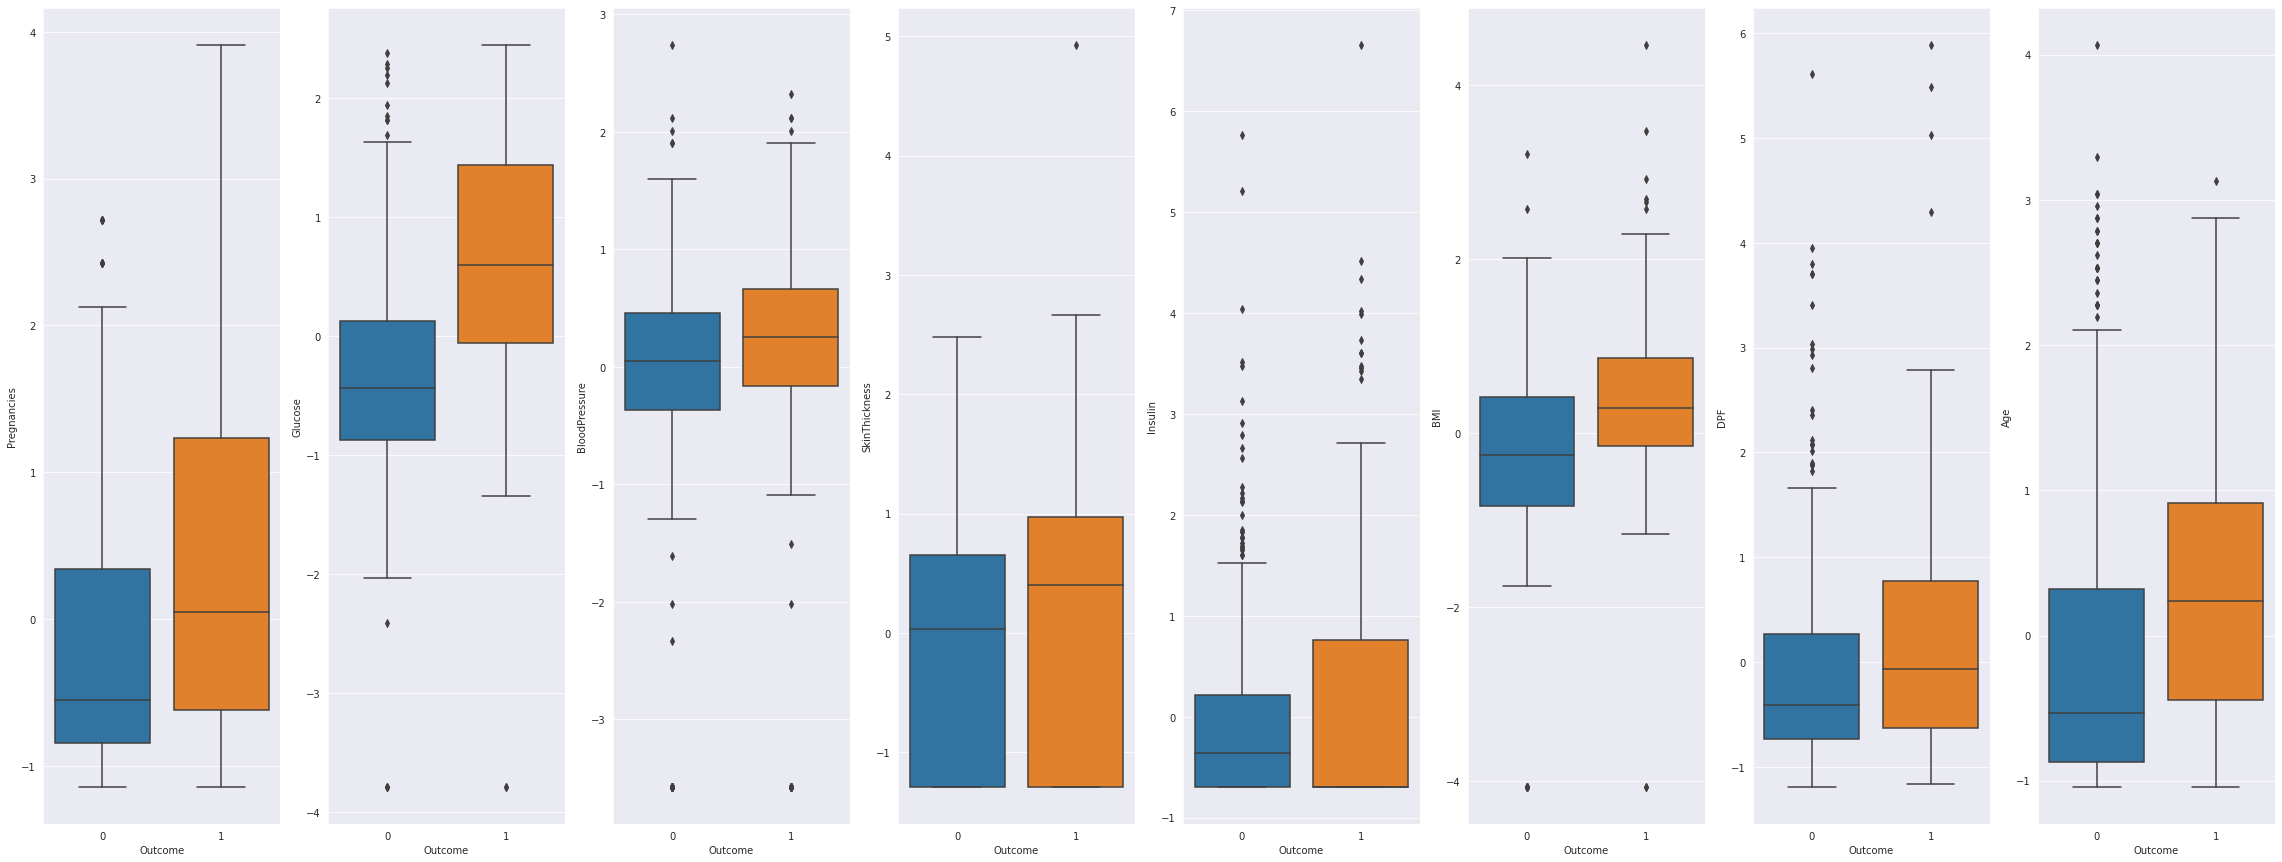

In [42]:
# Create boxplots to understand differences in distributions among people with and without diabetes
fig, axs = plt.subplots(ncols = len(features), figsize = (40, 15))

for idx, field in enumerate(features):
    sns.boxplot(x = 'Outcome', 
                y = field, 
                data = df_z,
                ax = axs[idx])

## George's Challenge
- How is boxplot made?
- How do we identify outliers using a boxplot?

## George's Tip
Python coding style and best practices
- https://academy.vertabelo.com/blog/python-coding-best-practices-and-style-guidelines/
- https://realpython.com/python-pep8/
- https://towardsdatascience.com/the-zen-of-python-write-beautiful-code-e36844381ee6

### Pandas Profiling
#### Automated data profiling

In [45]:
# let us try pandas-profiling now and see how does it simplifies the EDA
!pip install pandas-profiling

Processing /home/george/.cache/pip/wheels/d7/de/2e/efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd/wrapt-1.11.2-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 56 kB 541 kB/s eta 0:00:011
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.12.1
    Uninstalling wrapt-1.12.1:
      Successfully uninstalled wrapt-1.12.1
  Attempting uninstall: lazy-object-proxy
    Found existing installation: lazy-object-proxy 1.5.0
    Uninstalling lazy-object-proxy-1.5.0:
      Successfully uninstalled lazy-object-proxy-1.5.0


In [46]:
# Loading dataframe again, so that original features are considered
data = pd.read_csv("pima-indians-diabetes.csv")

In [47]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof
# to view report created by pandas profile

TypeError: concat() got an unexpected keyword argument 'join_axes'

## George's Challenge
How to solve this problem?

In [48]:
prof.to_file(output_file='output.html')
# to save report obtained via pandas profiling

NameError: name 'prof' is not defined

## George's Bonus
- Correlation vs. Association
- Correlation coefficient vs. PPS
- https://stats.stackexchange.com/questions/119835/correlation-between-a-nominal-iv-and-a-continuous-dv-variable
- https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598